**Notebook content**<br>
- K-means clustering
- How many clusters?
- Evaluating the model
- Feature transformation
- Visualization hierarchical clustering
- Different linkage(different hierarchical clustering)
- t-SNE visualization
- PCA
- Principal components 
- Intrinsic dimentions
- Variance of the PCA features
- Non-negative matrix factorization (NMF)

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
points = pd.read_csv('data\points.csv', index_col=0)
new_points = pd.read_csv('data\\new_points.csv', index_col=0)

In [3]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


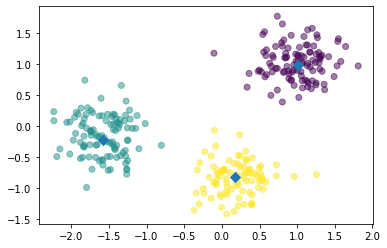

In [4]:
# Assign the columns of new_points: xs and ys
xs = new_points.iloc[:, 0]
ys = new_points.iloc[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

**Evaluating a clustering**

In [5]:
# seems that each cluster is completely separated from the other 2 clusters
pd.crosstab(labels, labels)

col_0,0,1,2
row_0,,,
0,106,0,0
1,0,105,0
2,0,0,89


In [6]:
# see how to choose number of clusters based on inertia.
# Lower values of the inertia are better.
N_k = range(1, 11)
inertias = []

for k in N_k:
    model = KMeans(n_clusters=k)
    model.fit(points)
    # inertia measures how far samples are from their centroids.
    inertias.append(model.inertia_)

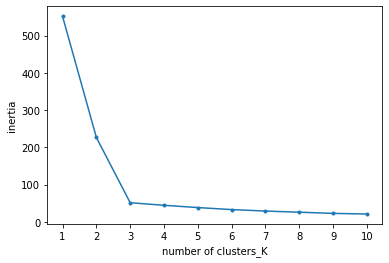

In [7]:
plt.plot(N_k, inertias, marker='.')
plt.xticks(N_k)
plt.xlabel('number of clusters_K')
plt.ylabel('inertia')
plt.show()

**Transforming features for better clusterings**

In [8]:
# the KMeans clusters may not correspond well, this is because that the features 
# have very different variances In KMeans clustering, the variance of a feature corresponds to 
# its influence on the clustering algorithm. 
# To give every feature a chance, the data needs to be transformed so that features have equal variance. 

df = pd.read_csv('data\wine.csv')
wine_df = df.drop(['class_label', 'class_name'], axis=1)
wine_model = KMeans(n_clusters=3)
labels = wine_model.fit_predict(wine_df)
pd.crosstab(labels, df['class_name'])
# this it not well clustered

class_name,Barbera,Barolo,Grignolino
row_0,,,
0,29,13,20
1,0,46,1
2,19,0,50


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

pipeline = make_pipeline(scaler, kmeans)
labels = pipeline.fit_predict(wine_df)
pd.crosstab(labels, df['class_name'])
# this time and after scaling the features we got fantastic results

class_name,Barbera,Barolo,Grignolino
row_0,,,
0,48,0,3
1,0,59,3
2,0,0,65


**Hierarchal clustering**

In [10]:
seeds_df = pd.read_csv('data\seeds.csv')
# samples = seeds_df.iloc[:, :t-SNE for 2-dimensional maps-1]
samples = seeds_df.iloc[:, :-1]
varieties = seeds_df.iloc[:, -1]

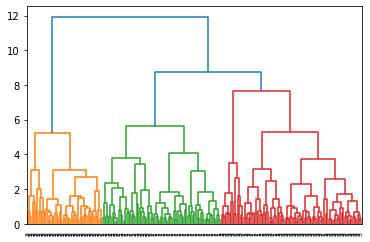

In [11]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(y=samples ,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=list(varieties),
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

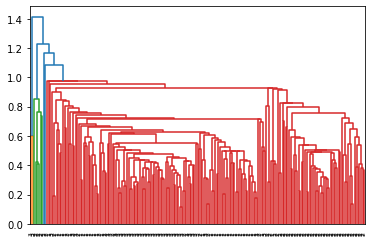

In [12]:
# The distance between two clusters is measured using a "linkage method".
mergings = linkage(y=samples ,method='single')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=list(varieties),
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

In [13]:
# The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function.

from scipy.cluster.hierarchy import fcluster

mergins = linkage(samples, method='complete')
# The second argument is the height to stop clustering.
labels = fcluster(mergins, 10, criterion='distance')
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [14]:
ct = pd.crosstab(labels, labels)
print(ct)

col_0   1    2
row_0         
1      47    0
2       0  162


In [15]:
# When placing lower height you will get more specific clusters with more varying labels
labels = fcluster(mergins, 5, criterion='distance')
print(labels)

[4 4 4 4 4 4 4 3 3 3 4 4 4 4 4 7 4 4 7 4 4 4 6 4 4 6 6 4 4 6 3 4 4 4 3 3 3
 4 5 6 6 6 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 6 6 6 6 7 6 6 4 4 4 6 3 3 3 2 3
 3 3 1 1 3 3 1 1 2 2 2 2 2 1 1 2 2 2 1 1 3 2 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2
 2 1 1 2 2 2 2 2 1 3 3 2 3 2 2 2 2 3 2 2 3 3 3 3 3 3 3 3 7 5 5 7 7 5 6 7 6
 7 7 5 7 7 7 5 7 7 7 7 6 7 7 7 5 6 7 6 7 7 5 5 7 7 7 7 7 7 5 6 7 7 7 7 5 7
 7 7 5 7 7 7 6 7 7 7 7 7 6 6 7 6 7 5 7 6 7 5 6 7]


In [16]:
ct = pd.crosstab(labels, labels)
print(ct)

col_0   1   2   3   4   5   6   7
row_0                            
1      11   0   0   0   0   0   0
2       0  36   0   0   0   0   0
3       0   0  32   0   0   0   0
4       0   0   0  42   0   0   0
5       0   0   0   0  14   0   0
6       0   0   0   0   0  26   0
7       0   0   0   0   0   0  48


In [17]:
Eurovision_df = pd.read_csv('https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv')

In [18]:
country_df = Eurovision_df.iloc[:42, 0:]
samples = country_df.drop(['From country', 'To country', 'Jury Points','Televote Points'], axis=1)

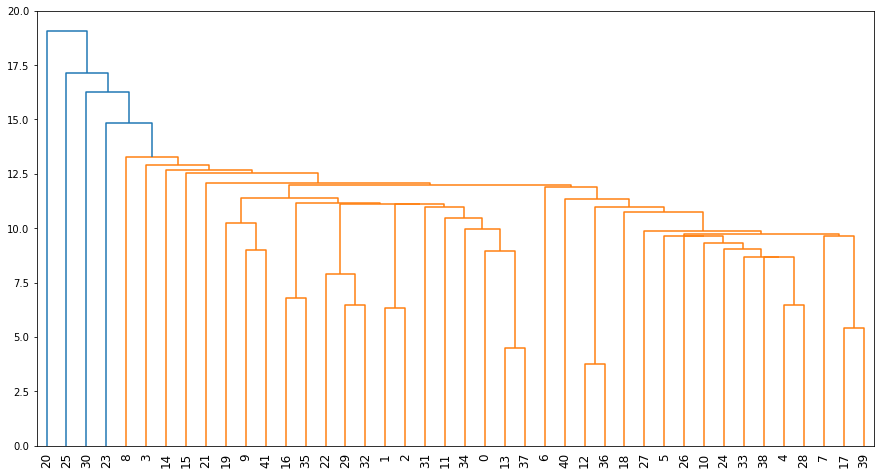

In [19]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

# Calculate the linkage: mergings
mergings = linkage(y=samples, method='single')

# Plot the dendrogram
plt.figure(figsize=(15, 8))

dendrogram(mergings,
            leaf_rotation=90,
            leaf_font_size=12)
plt.show()

**t-SNE for 2-dimensional maps**<br>
t-SNE only has a fit_transform method.

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
species = iris.target

In [21]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(samples)

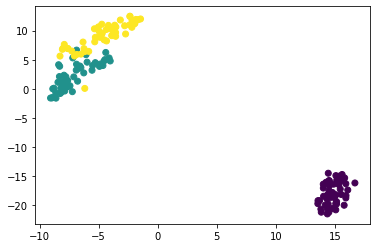

In [22]:
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c=species)
plt.show()

**Dimension reduction**<br>
Visualizing the PCA transformation

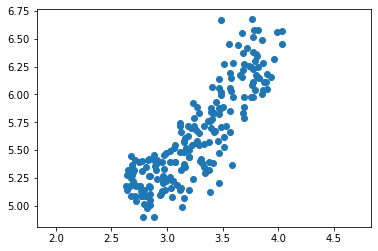

0.8604405325922296


In [23]:
# see the correlation before using the PCA
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Assign the 0th column of grains: width
width = seeds_df.iloc[:,4]

# Assign the 1st column of grains: length
length = seeds_df.iloc[:,3]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

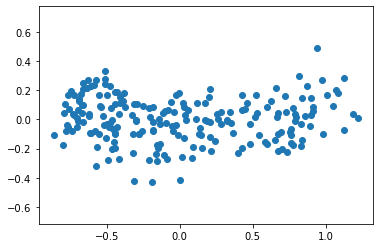

-8.326672684688674e-17


In [24]:
# Decorrelating the grain measurements with PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

grains = seeds_df.iloc[:, [4,3]]
    
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

# notic the data poins shifted with zero mean

In [25]:
# These are the directions in which the samples vary the most.
model.components_

array([[ 0.63917819,  0.76905867],
       [-0.76905867,  0.63917819]])

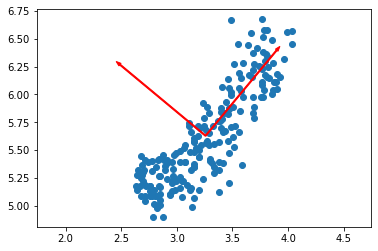

In [26]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]
second_pc = model.components_[1, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [27]:
first_pc

array([0.63917819, 0.76905867])

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

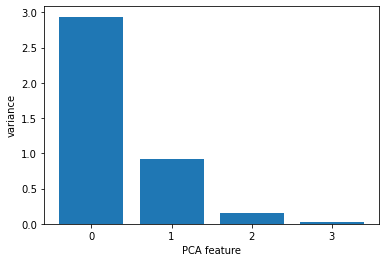

In [29]:
# Intrinsic dimension of the fish data
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [30]:
# csr_matrices(Sparse matrices) save space by remembering only the non-zero entries of the array. 
# TruncatedSVD performs the same transformation as PCA, but accepts csr matrices as input.
# TruncatedSVD and PCA in exactly the same way. 

In [31]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(samples)

# Print the shape of pca_features
print('Before applying PCA: ', samples.shape)
print('After applying the pca: ', pca_features.shape)

Before applying PCA:  (150, 4)
After applying the pca:  (150, 2)


In [32]:
# A tf-idf word-frequency array
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [33]:
# Scikit-learn's PCA doesn't support csr_matrices, and you'll need to use TruncatedSVD instead. 
# TruncatedSVD performs the same transformation as PCA, but accepts csr matrices as input.

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import  KMeans 
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [34]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('data\wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [35]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
0       0                                       HTTP 404
8       0                                        Firefox
7       0                                  Social search
6       0                    Hypertext Transfer Protocol
5       0                                         Tumblr
9       0                                       LinkedIn
3       0                                    HTTP cookie
2       0                              Internet Explorer
1       0                                 Alexa Internet
4       0                                  Google Search
49      1                                       Lymphoma
42      1                                    Doxycycline
41      1                                    Hepatitis B
40      1                                    Tonsillitis
45      1                                    Hepatitis C
46      1                                     Prednisone
47      1                      

In [36]:
df.shape

(60, 2)

**Non-negative matrix factorization (NMF)**

In [37]:
# NMF, like PCA, is a dimension reduction technique. In constract to PCA, however, NMF models are interpretable.
# NMF can not be applied to every dataset, however.  It is required that the sample features be "non-negative", so greater than or equal to 0.
# unlike PCA, the desired number of components must always be specified. NMF works both with numpy arrays and sparse arrays in the csr_matrix format. 

from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.36 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.38 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.47 0.   0.   0.  ]
 [0.   0.01 0.02 0.52 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.44 0.   0.  ]
 [0.   0.   0.   0.5  0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.58 0.   0.  ]
 [0.   0.   0.   0.53 0.01 0.01]
 [0.   0.4